In [1]:
#eda - exploratory data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Model from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve


# Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Exploration

In [3]:
#Finding out how many class are there
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

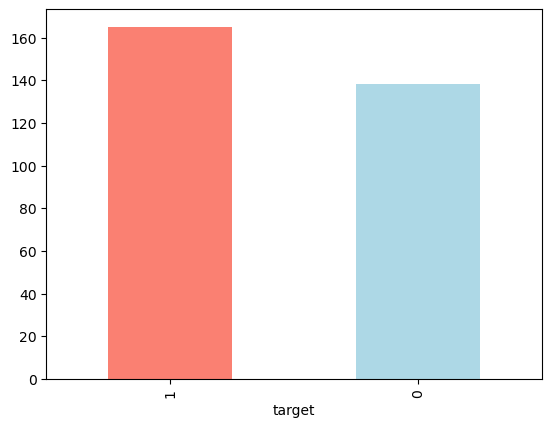

In [4]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [5]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Heart Disease Frequency according to Sex

In [7]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

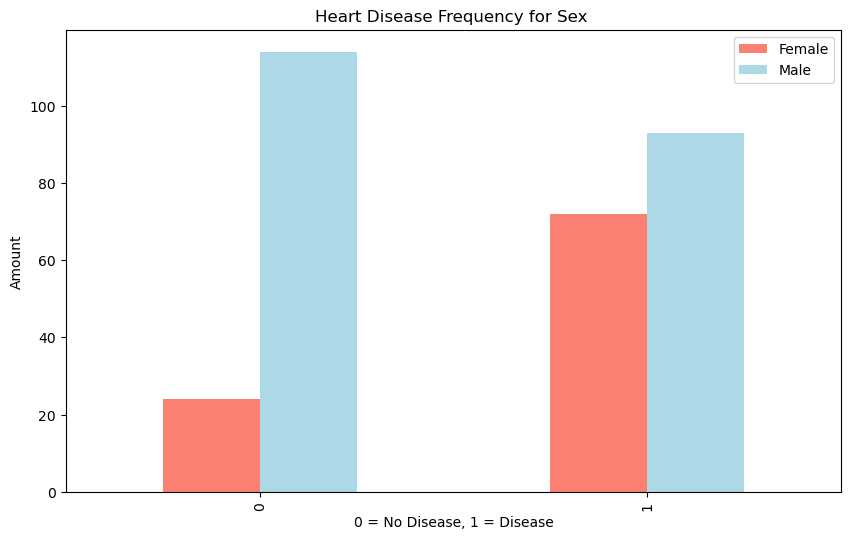

In [8]:
#Comapre target col with sex col
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"]);
plt.title("Heart Disease Frequency for Sex ")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);


# Age vs. Max Heart Rate for Heart Disease

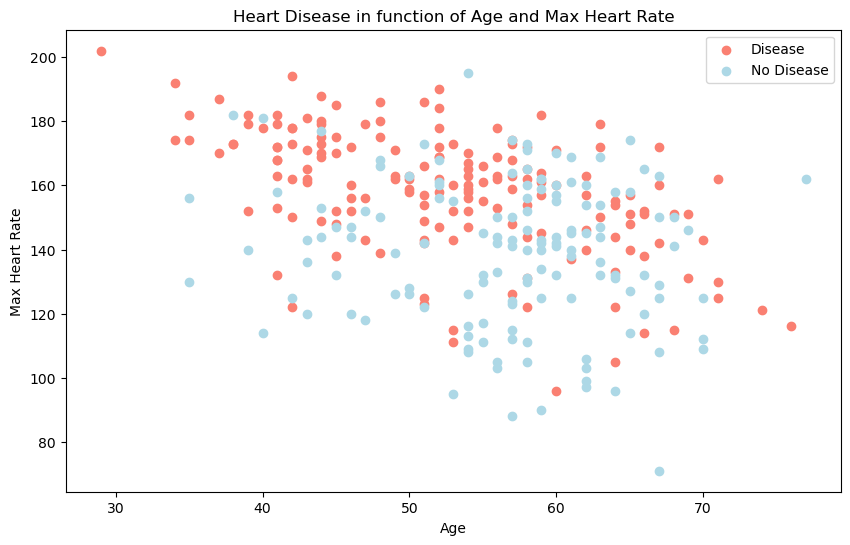

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon")
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target==0],c="lightblue")
plt.legend(["Disease","No Disease"]);
plt.title("Heart Disease in function of Age and Max Heart Rate");
plt.xlabel("Age")
plt.ylabel("Max Heart Rate");

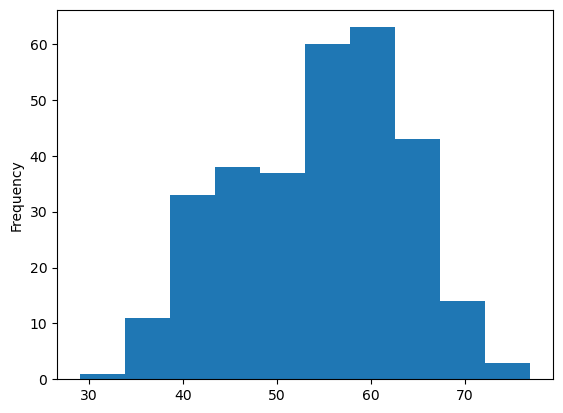

In [10]:
#Check the distribution of age column with a histogram or spread of data
df.age.plot.hist();

# Heart Disease Frequency per Chest Pain Type

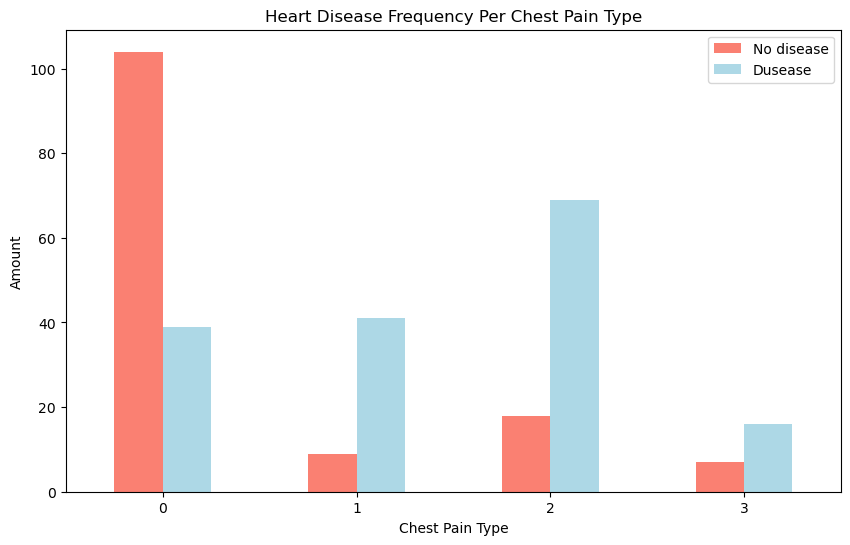

In [11]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No disease","Dusease"])
plt.xticks(rotation=0);

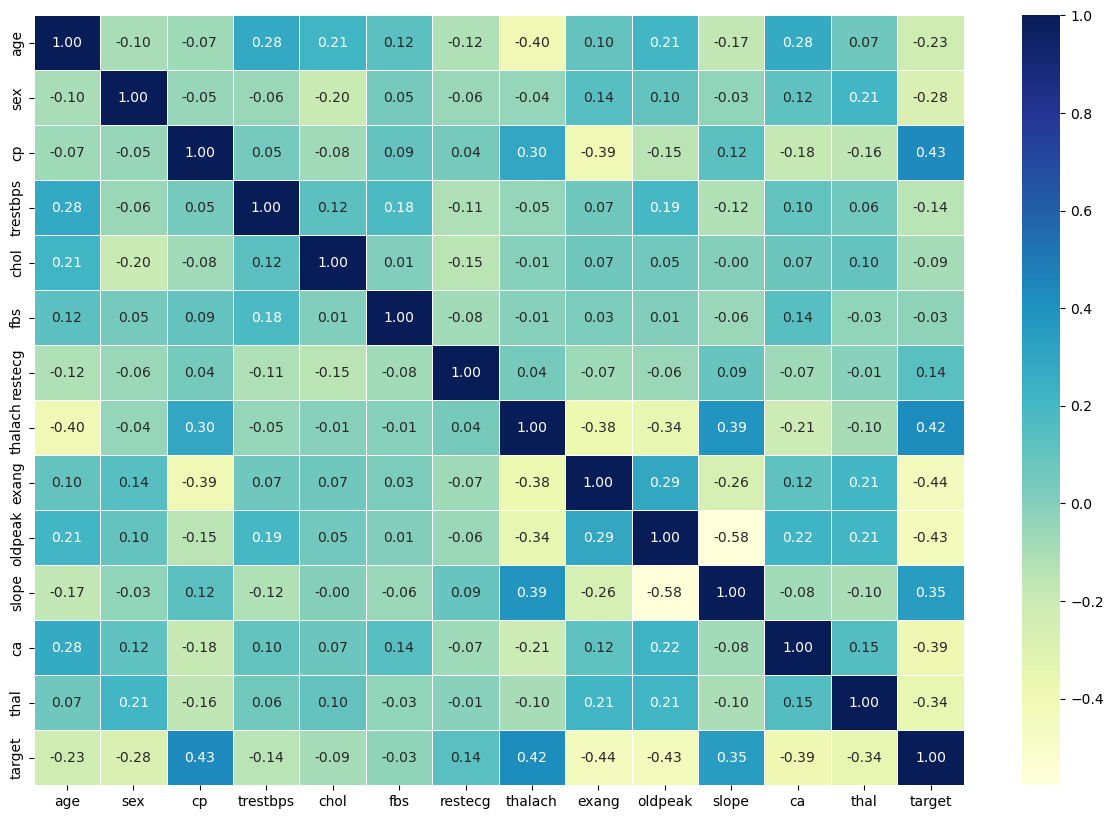

In [12]:
#Make a correlation Matrix
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
#Negative correlation and positive correlation
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")

# Modelling

In [13]:
#Split data into X and y
X = df.drop("target",axis=1)
y=df["target"]

In [14]:
X,y

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   3       145   233    1        0      150      0      2.3   
 1     37    1   2       130   250    0        1      187      0      3.5   
 2     41    0   1       130   204    0        0      172      0      1.4   
 3     56    1   1       120   236    0        1      178      0      0.8   
 4     57    0   0       120   354    0        1      163      1      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130   236    0        0      174      0      0.0   
 
      slope  ca  thal  
 0        0   0     1  
 1        0   0     2  
 2

In [15]:
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [16]:
 models = {"Logistic Regression" : LogisticRegression(max_iter=1000),
         "KNN" : KNeighborsClassifier(),
         "Random Forest" : RandomForestClassifier()}

 def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluate given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    np.random.seed(42)
    models_scores = {}
    
    for name,model in models.items():
        model.fit(X_train,y_train)
        models_scores[name] = model.score(X_test,y_test)
    return models_scores
    

In [17]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

# Model Comparision

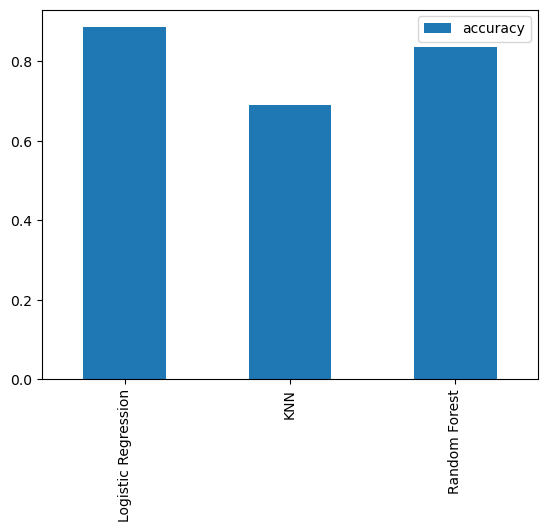

In [18]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

# Hyper Parameters tuning (by hand)

In [19]:
train_scores = []
test_scores = []
neighbors = range(1,21)
knn = KNeighborsClassifier()
for i in  neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [20]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [21]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data : 75.41%


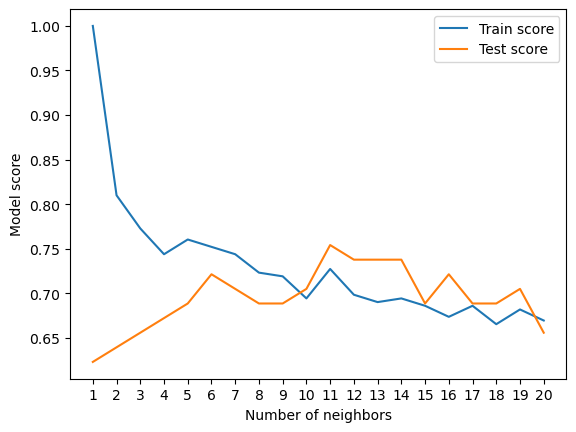

In [22]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
print(f"Maximum KNN score on the test data : {max(test_scores)*100:.2f}%")

# Hyperparameter tuning with RandomizedSearchCV

We are going to tune:
1. LogisticeRegression()
2. RandomForestClassifier()

using RandomizedSearchCV

In [23]:
#Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C":np.logspace(-4,4,20),
               "solver":["liblinear"]}
#create hyperparameter grid for RandomForestClassifier
#arange since continuous distribution is a must
rf_grid = {"n_estimators":np.arange(10,1000,50),
          "max_depth" : [None,3,5,10],
          "min_samples_split" : np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}

In [24]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit hyper parameter search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [25]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [26]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

# Tuning RandomForestClassifier

In [27]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),param_distributions = rf_grid,
                      cv=5,
                          n_iter =20,
                          verbose = True)

#Fit the data train
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [28]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [29]:
#Evaluation of our model
rs_rf.score(X_test,y_test)

0.8688524590163934

In [30]:
##Hyper parameters tuning using grid search cv


In [31]:
#Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C":np.logspace(-4,4,30),
               "solver":["liblinear"]}
#create hyperparameter grid for RandomForestClassifier
#arange since continuous distribution is a must
rf_grid = {"n_estimators":np.arange(10,1000,50),
          "max_depth" : [None,3,5,10],
          "min_samples_split" : np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}

In [32]:
gs_log_reg = GridSearchCV(LogisticRegression(),param_grid = log_reg_grid,
                         cv=5,
                         verbose = True)
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [33]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [34]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

#Evaluating our machine learning classifier beyone accuracy
1. Roc curve and AUC score
2. Confusion Matrix
3. Classification report
4. Precision
5. Recall
6. F1-score

To make and comparision and evaluate our trained model first we need to make predictions

In [35]:
#Make prediction with tuned model

y_preds = gs_log_reg.predict(X_test) 

In [36]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [37]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [46]:
#Import Roc curve and calculate and calcilate AUC metric
from sklearn.metrics import RocCurveDisplay


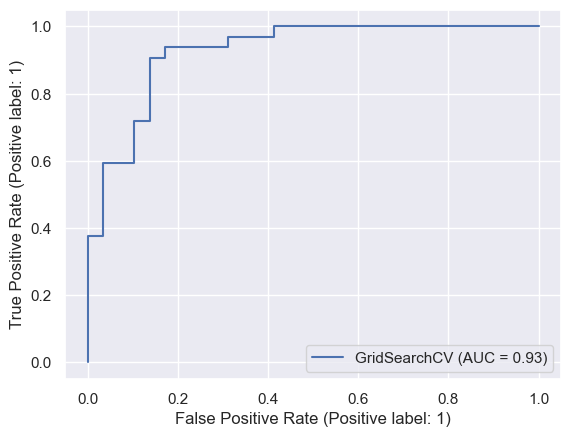

In [59]:
RocCurveDisplay.from_estimator(gs_log_reg,X_test,y_test);

In [50]:
#Confusion matrix
confusion_val = confusion_matrix(y_test,y_preds)


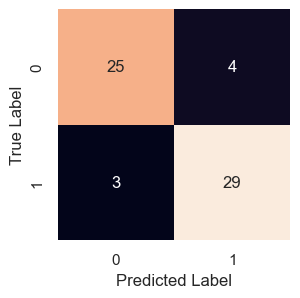

In [58]:
sns.set(font_scale=1.0)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice lloking confusion matrix using Seaborn's heatmap()
      """
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_val,annot=True,cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    
    
plot_conf_mat(y_test,y_preds)
    
  

In [60]:
#now lets get a classification report and cross validation precision, recall and f1-score

In [62]:
print(classification_report(y_test,y_preds) )

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [63]:
#Calculate evaluation metrics using cross-validation



In [97]:
#Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [98]:
clf = LogisticRegression(C= 0.20433597178569418,
                       solver = "liblinear" )

In [99]:
#Cross validated accuracy
from sklearn.model_selection import cross_val_score

cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc = np.mean(cv_acc)

In [100]:
cv_prec = cross_val_score(clf,X,y,cv=5,scoring="precision")

In [101]:
cv_prec

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [102]:
cv_prec = np.mean(cv_prec)

In [103]:
cv_prec

0.8207936507936507

In [104]:
cv_rec = cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_rec = np.mean(cv_rec)

In [105]:
cv_rec

0.9212121212121213

In [106]:
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1 = np.mean(cv_f1)

In [107]:
cv_f1

0.8673007976269721

In [108]:
#Visualize our cross validate matrix

In [109]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc, "Precision": cv_prec, "Recall": cv_rec, "f1-score": cv_f1}, index=[0, 1, 2, 3, 4])

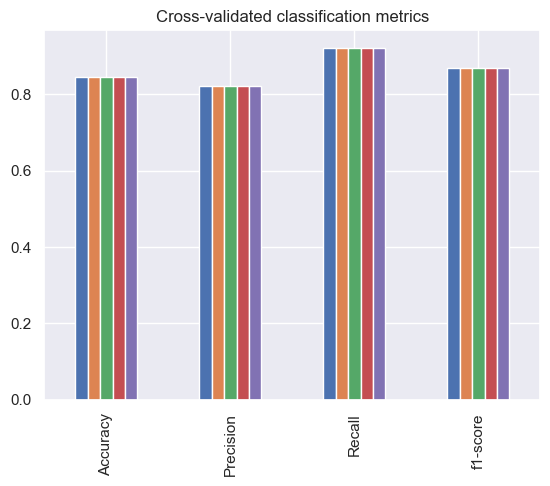

In [110]:
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",legend=False);

In [112]:
clf = LogisticRegression(C= 0.20433597178569418,
                       solver = "liblinear" )
clf.fit(X_train,y_train)
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [113]:
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

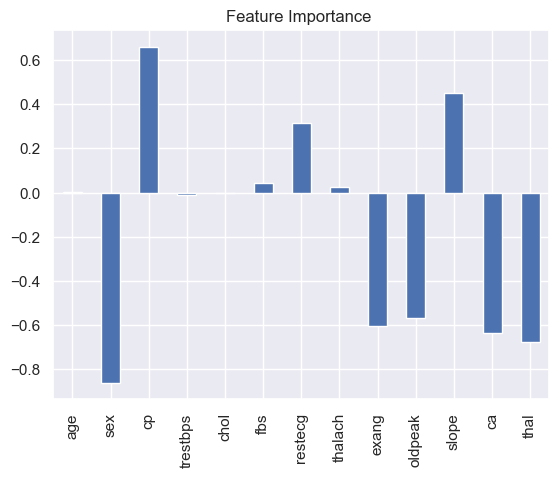

In [117]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance ", legend = False);

In [118]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
